In [1]:
# Environment variable
main_data_dir = 'D:/Data/HAM100000 - Harvard Dataset'
metadata_dir = main_data_dir + '/HAM10000_metadata.csv'
img_data_dir = main_data_dir + '/img_data'
test_data_dir = main_data_dir + '/test'
test_label_dir = main_data_dir + '/test_label.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.image as mpimg

# Metadata

In [3]:
metadata_df = pd.read_csv(metadata_dir)
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [4]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [5]:
metadata_df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [6]:
metadata_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

<AxesSubplot:>

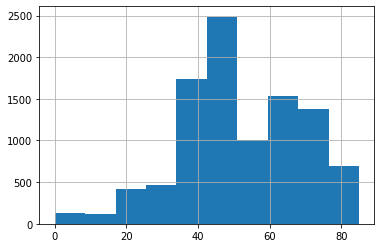

In [7]:
metadata_df['age'].hist()

<AxesSubplot:>

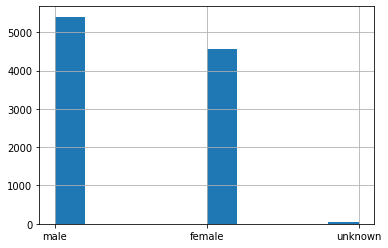

In [8]:
metadata_df['sex'].hist()

In [9]:
metadata_df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [10]:
metadata_df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [11]:
metadata_df['dataset'].value_counts()

vidir_molemax    3954
vidir_modern     3363
rosendahl        2259
vienna_dias       439
Name: dataset, dtype: int64

# Test Label

In [12]:
test_label_df = pd.read_csv(test_label_dir)
test_label_df.head()

,image_id,interaction_modality,prob_m_mal,prob_m_dx_akiec,prob_m_dx_bcc,prob_m_dx_bkl,prob_m_dx_df,prob_m_dx_mel,prob_m_dx_nv,prob_m_dx_vasc,...,user_dx_without_interaction_mel,user_dx_without_interaction_nv,user_dx_without_interaction_vasc,user_dx_with_interaction_akiec,user_dx_with_interaction_bcc,user_dx_with_interaction_bkl,user_dx_with_interaction_df,user_dx_with_interaction_mel,user_dx_with_interaction_nv,user_dx_with_interaction_vasc
0,ISIC_0034524,Malignancy Probability (AI),"3,6112365E-07","3,90293E-08","8,117796E-08","1,230346E-06","6,8621403E-06","2,409164E-07","0,9999885","3,0752137E-06",...,0,0,0,0,0,0,0,0,1,0
1,ISIC_0034525,Malignancy Probability (AI),"0,00063954331927","4,6960016E-05","8,363065E-05","8,099651E-05","0,82006663","0,00050895265","0,17920908","3,744718E-06",...,0,1,0,0,0,0,0,0,1,0
2,ISIC_0034525,Multiclass Probabilities (Crowd),"0,00063954331927","4,6960016E-05","8,363065E-05","8,099651E-05","0,82006663","0,00050895265","0,17920908","3,744718E-06",...,0,0,0,0,0,0,0,0,1,0
3,ISIC_0034526,CBIR (AI),"0,03198014359805","0,01575451","0,00038216423","0,935222","0,00071165885","0,01584347","0,032083057","3,17123E-06",...,1,0,0,0,0,5,0,0,0,0
4,ISIC_0034526,Malignancy Probability (AI),"0,03198014359805","0,01575451","0,00038216423","0,935222","0,00071165885","0,01584347","0,032083057","3,17123E-06",...,2,0,0,0,0,2,0,2,0,0


In [13]:
test_label_df.shape

(3762, 31)

In [14]:
test_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   image_id                           3762 non-null   object
 1   interaction_modality               3762 non-null   object
 2   prob_m_mal                         3762 non-null   object
 3   prob_m_dx_akiec                    3762 non-null   object
 4   prob_m_dx_bcc                      3762 non-null   object
 5   prob_m_dx_bkl                      3762 non-null   object
 6   prob_m_dx_df                       3762 non-null   object
 7   prob_m_dx_mel                      3762 non-null   object
 8   prob_m_dx_nv                       3762 non-null   object
 9   prob_m_dx_vasc                     3762 non-null   object
 10  prob_h_dx_akiec                    3762 non-null   object
 11  prob_h_dx_bcc                      3762 non-null   object
 12  prob_h

 # Image

In [15]:
img_paths = glob.glob(img_data_dir + '/*')
print("Number of images: {}".format(len(img_paths)))
print("Example: {}".format(img_paths[0]))

Number of images: 10015
Example: D:/Data/HAM100000 - Harvard Dataset/img_data\ISIC_0024306.jpg


Example Image


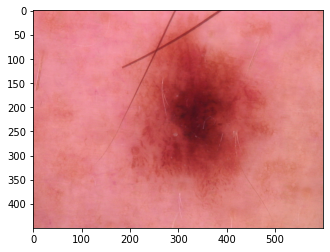

In [16]:
print("Example Image")
img = mpimg.imread(img_paths[0])
imgplot = plt.imshow(img)
plt.show()

In [17]:
print(type(img))

<class 'numpy.ndarray'>


In [18]:
img.shape

(450, 600, 3)

In [19]:
img.shape[0]

450